## Observations and Insights 

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data = pd.merge(mouse_metadata,study_results, how = 'outer', on = 'Mouse ID')
# Display the data table for preview
study_data.head(15)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [9]:
# Checking the number of mice.
mice_count = len(study_data['Mouse ID'].unique())
mice_count

249

In [39]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = study_data[study_data.duplicated(['Mouse ID','Timepoint'])]['Mouse ID'].unique()
duplicates

array(['g989'], dtype=object)

In [36]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = [study_data.loc[study_data['Mouse ID'] == x] for x in duplicates]
duplicate_data

[    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
 908     g989     Propriva  Female          21          26          0   
 909     g989     Propriva  Female          21          26          0   
 910     g989     Propriva  Female          21          26          5   
 911     g989     Propriva  Female          21          26          5   
 912     g989     Propriva  Female          21          26         10   
 913     g989     Propriva  Female          21          26         10   
 914     g989     Propriva  Female          21          26         15   
 915     g989     Propriva  Female          21          26         15   
 916     g989     Propriva  Female          21          26         20   
 917     g989     Propriva  Female          21          26         20   
 918     g989     Propriva  Female          21          26         25   
 919     g989     Propriva  Female          21          26         30   
 920     g989     Propriva  Female          21     

In [58]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
for x in duplicates:
    clean_data = study_data.loc[study_data['Mouse ID'] != x].reset_index(drop=True)
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [59]:
# Checking the number of mice in the clean DataFrame.
new_mice_count = len(clean_data['Mouse ID'].unique())
new_mice_count

248

## Summary Statistics

In [60]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.



In [63]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_group = clean_data.groupby('Drug Regimen')
regimen_group.agg({'Tumor Volume (mm3)': ['mean','median','var','std','sem']})
# This method produces everything in a single groupby function


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [115]:
regimen_group

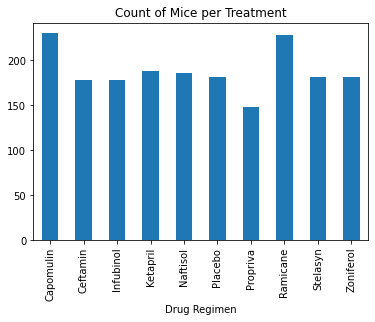

In [116]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
regimen_group['Mouse ID'].count().plot.bar(title = 'Count of Mice per Treatment')

Text(0.5, 0, 'Drug Regimen')

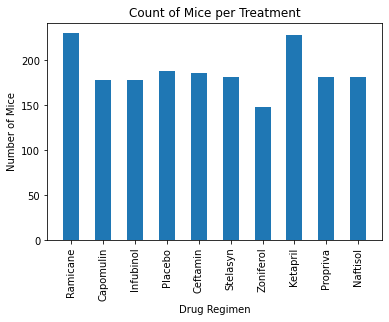

In [128]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = []
x_axis = [x for x in range(len(regimen_group))]
heights = []
heights = [y for y in regimen_group['Mouse ID'].count()]
plt.bar(x_axis,heights,width = .5)
plt.title('Count of Mice per Treatment')
plt.xlim(-0.75,len(x_axis)-0.25)
tick_locations = [value for value in x_axis]
plt.xticks(ticks = tick_locations,labels = clean_data['Drug Regimen'].unique(),rotation = 90)
plt.ylabel('Number of Mice')
plt.xlabel('Drug Regimen')

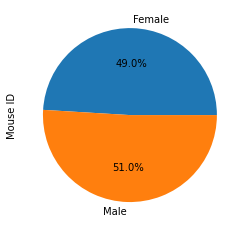

In [130]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_group = clean_data.groupby('Sex')
sex_group['Mouse ID'].count().plot.pie(autopct = '%1.1f%%')


Text(0, 0.5, 'Mouse ID')

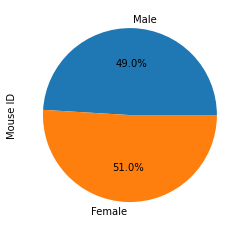

In [134]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sizes = sex_group['Mouse ID'].count()
labels = clean_data['Sex'].unique()
plt.pie(sizes, labels = labels, autopct = '%1.1f%%')
plt.ylabel('Mouse ID')

## Quartiles, Outliers and Boxplots

In [189]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Treatments = ['Capomulin','Ramicane','Infubinol','Ceftamin']
best_drugs_df = clean_data.loc[(clean_data['Drug Regimen']==Treatments[0])|(clean_data['Drug Regimen']==Treatments[1])|(clean_data['Drug Regimen']==Treatments[2])|(clean_data['Drug Regimen']==Treatments[3])]
best_drugs_df.reset_index(drop=True)
    
# Start by getting the last (greatest) timepoint for each mouse
#best_group = best_drugs_df.groupby('Mouse ID')
#last_time = best_group['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_volumes = best_drugs_df.drop_duplicates('Mouse ID',keep = 'last')
last_volumes.reset_index(drop = True)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
95,x822,Ceftamin,Male,3,29,45,61.386660,3
96,y163,Infubinol,Female,17,27,45,67.685569,3
97,y769,Ceftamin,Female,6,27,45,68.594745,4
98,y865,Ceftamin,Male,23,26,45,64.729837,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
Treatments = ['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
